In [1]:
from __future__ import annotations

import particle_in_a_box as pib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import default_plot as dp

plt.rcParams["text.usetex"] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Dejavu Serif'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'

adding state(s):  [0, 1]
current config:  [0, 1]


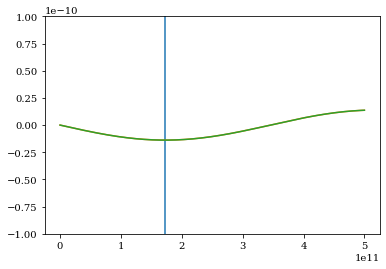

In [19]:
gamma = -10
L = np.pi
m = 1
states = [0, 1]
amps = [1, 1]
another_state = pib.Particle_in_Box_State("symmetric", L, m, states, amps, gamma)

fig = plt.figure()
time = np.linspace(0, 5*10**11, 500)
plt.ylim([-10**(-10), 10**(-10)])
plt.plot(time, another_state.x_space_expectation_value(time))
plt.plot(time, another_state.new_k_space_expectation_value(time))
plt.plot(time, another_state.x_space_expectation_value_derivative(time))

In [2]:
gamma = 10
L = np.pi
m = 1
states = [1,2,3,4,5,6]
amps = [1,0.5,0.25,0.125,0.1,0.1]


myState = pib.Particle_in_Box_State("symmetric", L, m, states, amps, gamma)
myState.case = "dirichlet_neumann"

adding state(s):  [1, 2, 3, 4, 5, 6]
current config:  [1, 2, 3, 4, 5, 6]


removing state(s):  [0, 1]
current config:  []
adding state(s):  [0, 1]
current config:  [0, 1]
auto setting time to:  3.398532855103892


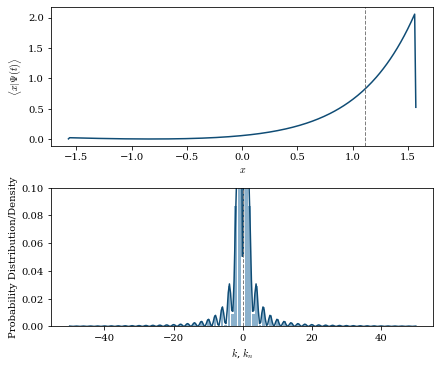

In [18]:
fig = plt.figure(constrained_layout = True, figsize=(6,5))
gs = fig.add_gridspec(nrows=2, ncols=1)

myState.reset()
myState.case = "symmetric"
myState.gamma = -1
myState.add_state([0, 1], [1, 1])

position_plot = dp.Position_Space_Plot(myState, fig, gs, [0,0])
momentum_plot = dp.Momentum_Space_Plot(myState, fig, gs, [1,0])
momentum_plot.set_n_bound(50)
momentum_plot.axis.set_ylim([0, 0.1])


position_plot.expectation_value = True
momentum_plot.expectation_value = True

combined_plot = dp.Multi_Plot(position_plot, momentum_plot)
combined_plot.animate(20, 2, 10)
#myState.energy_space_wavefunction.energies

In [11]:
myState._sp.k_kappa_l

[0.8822518194852552j, 1.6537730444725365]

removing state(s):  [2, 3]
current config:  []
adding state(s):  [2, 3]
current config:  [2, 3]


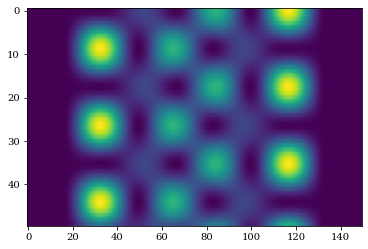

In [4]:
carpet_plot = dp.Carpet_Plot(myState)
carpet_plot.x_interval = [-2, 2]

myState.reset()
myState.add_state([2,3], [1,1])
myState.m = 1
myState.case = "dirichlet"

carpet_plot.x_res = 150
time = np.linspace(0, 5, 50)
carpet_plot.plot(time)


removing state(s):  [0, 1]
current config:  []
adding state(s):  [2, 3]
current config:  [2, 3]


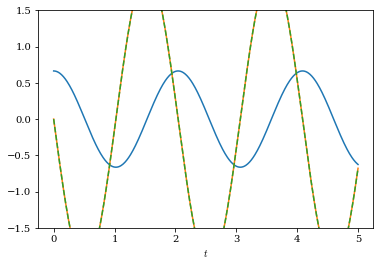

In [27]:
expectation_value_plot = dp.Expectation_Value_Plot(myState)

T = 10
eps = 0.1
fps = 20
num_frames = fps*T

myState.case = "symmetric"
myState.gamma = np.tan(-np.pi/2+eps)
myState.reset()
myState.add_state([2, 3], [1, 1])

time = np.linspace(0, 5, 500)

expectation_value_plot.axis.set_ylim([-1.5, 1.5])
expectation_value_plot.plot(time)
#expectation_value_plot.axis.legend()

def animate_frame(i):
    myState.gamma = np.tan(-np.pi/2+eps + (i/fps)*(np.pi-2*eps)/T)
    expectation_value_plot.update()
    expectation_value_plot.x_exp_line[0].set_data(time, myState.x_space_expectation_value(time))
    expectation_value_plot.k_exp_line[0].set_data(time, myState.new_k_space_expectation_value(time))
    expectation_value_plot.x_exp_deriv_line[0].set_data(time, myState.m * myState.x_space_expectation_value_derivative(time))

    return expectation_value_plot.x_exp_line + expectation_value_plot.k_exp_line + expectation_value_plot.x_exp_deriv_line

anim = FuncAnimation(expectation_value_plot.fig, animate_frame, frames=int(num_frames), interval=int(1/fps*1000), blit=True)
anim

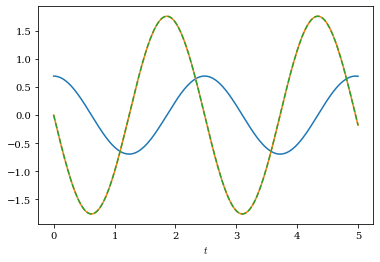

115


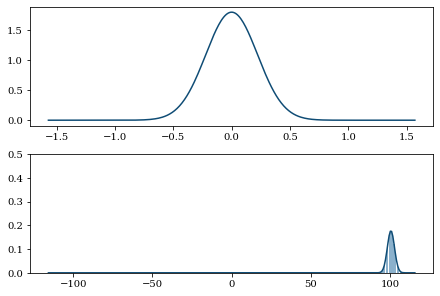

In [4]:
# Gaussian Playground
import Special_States as special

case = "dirichlet_neumann"
L = np.pi
m = 1
a = L/10
l_0 = 100
l_range = 15
gaussian = special.Bouncing_Gaussian(case, L, m, l_0, l_range, a)

T = ((4*m*L**2)/np.pi)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1)
gaussian_pos = dp.Position_Space_Plot(gaussian, fig, gs, [0,0])
gaussian_momentum = dp.Momentum_Space_Plot(gaussian, fig, gs, [1,0])


gaussian_plot = dp.Multi_Plot(gaussian_pos, gaussian_momentum)
gaussian_momentum.set_n_bound(l_0+l_range)
gaussian_momentum.axis.set_ylim([0, 0.5])
gaussian_plot.plot(0)

#gaussian_plot.animate(20, 2, 0.01)